In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [4]:
df['bath'].fillna(0, inplace=True)
df['price'].fillna(0, inplace=True)
df['balcony'].fillna(0, inplace=True)

In [5]:
df.drop(['availability', 'society', 'location'], axis='columns', inplace=True)
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
area_type     13320 non-null object
size          13304 non-null object
total_sqft    13320 non-null object
bath          13320 non-null float64
balcony       13320 non-null float64
price         13320 non-null float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [7]:
maps = {}
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique())}

def integer_encode(df, variable, ordinal_mapping):
    df[variable] =  df[variable].map(ordinal_mapping)
    maps[variable] = mappings
    
for variable in df.columns:
    if df[variable].dtype == "object":
        mappings = find_category_mappings(df, variable)
        integer_encode(df, variable,  mappings)
        maps[variable] = mappings

In [8]:
f=open('mapping.txt','w')
f.write(str(maps))
f.close()

In [9]:
df1 = df
df1

,area_type,size,total_sqft,bath,balcony,price
0,0,0,0,2.0,1.0,39.07
1,1,1,1,5.0,3.0,120.00
2,2,2,2,2.0,3.0,62.00
3,0,2,3,3.0,1.0,95.00
4,0,0,4,2.0,1.0,51.00
5,0,0,5,2.0,1.0,38.00
6,0,3,6,4.0,0.0,204.00
7,0,3,7,4.0,0.0,600.00
8,0,2,8,3.0,1.0,63.25
9,1,4,9,6.0,0.0,370.00


In [10]:
X = df1.iloc[:,:-1]
X.head()

,area_type,size,total_sqft,bath,balcony
0,0,0,0,2.0,1.0
1,1,1,1,5.0,3.0
2,2,2,2,2.0,3.0
3,0,2,3,3.0,1.0
4,0,0,4,2.0,1.0


In [11]:
y = df1['price']
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [13]:
# X_train['society'].fillna(0, inplace=True)
X_train.head()
# why we choose machine learning, algorithm used for our problem, why regressor algorithm is implemented in this problem and existing system, proposed system, future scope, data visualization purposes

,area_type,size,total_sqft,bath,balcony
8222,0,2,1704,3.0,0.0
601,0,6,19,1.0,0.0
11937,0,2,891,2.0,2.0
11873,0,6,710,1.0,1.0
10388,0,0,12,2.0,3.0


In [14]:
r = DecisionTreeRegressor()
r.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_pred = r.predict(X_test)
y_pred

array([ 69.        , 103.75      ,  59.39722222, ...,  57.375     ,
       154.        ,  80.305     ])

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mean_squared_error = ' + str(mse))

print('r2_score=' + str(r2))

mean_squared_error = 26512.132046300772
r2_score=-0.21745451444750574


ValueError: x and y must be the same size

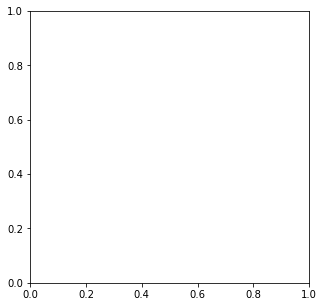

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.scatter(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.text(max(y_test), min(y_pred), f'MSE: {mse:.2f}', ha='right', va='bottom', color='red')
plt.text(max(y_test), min(y_pred), f'R2: {r2:.2f}', ha='right', va='top', color='blue')

plt.show()



Mean Squared Error: 0.6536995137170021
R-squared score: 0.8072059636181392


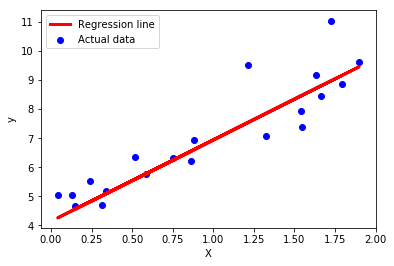

In [18]:

from sklearn.linear_model import LinearRegression


# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
# Calculate R-squared
r2LR = r2_score(y_test, predictions)
print('R-squared score:', r2LR)

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, predictions, color='red', linewidth=3, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


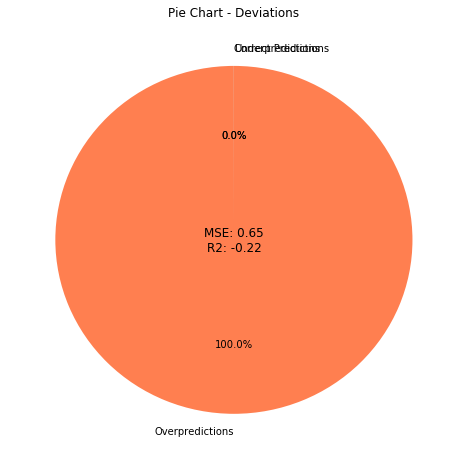

<Figure size 432x288 with 0 Axes>

In [19]:

deviations = np.abs(y_pred - y_test)

labels = ['Correct Predictions', 'Overpredictions', 'Underpredictions']
sizes = [
    np.sum(deviations == 0),
    np.sum(y_pred > y_test),
    np.sum(y_pred < y_test)
]
colors = ['lightgreen', 'coral', 'lightblue']
plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Pie Chart - Deviations')
plt.text(0, 0, f'MSE: {mse:.2f}\nR2: {r2:.2f}', ha='center', va='center', color='black', fontsize=12)
plt.show()
plt.savefig('deviations_pie_chart.png')

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best R-squared score
print("Best Parameters: ", grid_search.best_params_)
print("Best R-squared Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R-squared Score:  0.6595541294634214


In [21]:
# Access feature importances from the best estimator
feature_importances = grid_search.best_estimator_.feature_importances_


In [22]:
joblib.dump(r, 'houses.joblib')


['houses.joblib']

In [23]:
df.iloc[2:3].to_csv('house.csv')
df.iloc[4:5].to_csv('house1.csv')
df.iloc[5:6].to_csv('house2.csv')